In [44]:
import pandas as pd
import math
import statistics
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, RocCurveDisplay, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from math import sqrt
import matplotlib.pyplot as plt
import warnings
import sys
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

warnings.filterwarnings('ignore')

sys.path.append("..")

## Задание 1

In [2]:
data_test = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

In [3]:
data_1 = pd.DataFrame(data_test, columns = ["weather", "walk"])
data_1.head(10)

,weather,walk
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [4]:
#P(A|B)
P_weather = len(data_1[data_1['walk'] == True]) / len(data_1)
P_walk = len(data_1[data_1['weather'] == 'дождь']) / len(data_1)
P_BA = len(data_1[(data_1['walk'] == True) & (data_1['weather'] == 'дождь')]) / len(data_1[data_1['walk'] == True])
print(P_weather * P_BA / P_walk)

0.3333333333333333


## Задание 2

In [5]:
data = pd.read_csv(f'../data/csgo_task.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  float64
 2   t_score           121386 non-null  float64
 3   map               122199 non-null  object 
 4   bomb_planted      122410 non-null  bool   
 5   ct_health         122410 non-null  float64
 6   t_health          121627 non-null  float64
 7   ct_armor          122410 non-null  float64
 8   t_armor           122410 non-null  float64
 9   ct_money          122410 non-null  float64
 10  t_money           122410 non-null  float64
 11  ct_helmets        121766 non-null  float64
 12  t_helmets         121560 non-null  float64
 13  ct_defuse_kits    121766 non-null  float64
 14  ct_players_alive  122410 non-null  float64
 15  t_players_alive   122182 non-null  float64
dtypes: bool(1), float64(

In [6]:
data.head(10)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
5,114.97,1.0,0.0,de_dust2,False,500.0,500.0,500.0,0.0,1750.0,10550.0,5.0,0.0,1.0,5.0,5.0
6,94.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0
7,74.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0
8,54.97,1.0,0.0,de_dust2,False,249.0,89.0,269.0,0.0,2300.0,2950.0,3.0,0.0,0.0,3.0,1.0
9,174.97,2.0,0.0,de_dust2,False,500.0,500.0,196.0,0.0,19800.0,23450.0,2.0,0.0,0.0,5.0,5.0


## Обработка данных

In [7]:
data.isna().sum()

time_left              0
ct_score               0
t_score             1024
map                  211
bomb_planted           0
ct_health              0
t_health             783
ct_armor               0
t_armor                0
ct_money               0
t_money                0
ct_helmets           644
t_helmets            850
ct_defuse_kits       644
ct_players_alive       0
t_players_alive      228
dtype: int64

In [8]:
# t_score
for i in range(len(data['t_score'])-1):
    if math.isnan(data['t_score'].loc[data.index[i]]):
        if data['t_score'].loc[data.index[i]] <= data['t_score'].loc[data.index[i-1]]:
            data['t_score'].loc[data.index[i]] = data['t_score'].loc[data.index[i-1]]           
        else:
            j=i
            while math.isnan(data['t_score'].loc[data.index[j]]):
                j+=1
            data['t_score'].loc[data.index[i]] = data['t_score'].loc[data.index[j]]


In [9]:
# map
for i in range(len(data['map'])):
    if str(data['map'].loc[data.index[i]]) == 'nan':
        if data['t_score'].loc[data.index[i]] + data['ct_score'].loc[data.index[i]] > 10:
            data['map'].loc[data.index[i]] = data['map'].loc[data.index[i-1]]
        else: 
            data['map'].loc[data.index[i]] = data['map'].loc[data.index[i+1]]

In [10]:
# t_health
for i in range(len(data['t_health'])):
    if math.isnan(data['t_health'].loc[data.index[i]]-1):
        if data['t_score'].loc[data.index[i]] + data['ct_score'].loc[data.index[i]] != data['t_score'].loc[data.index[i+1]] + data['ct_score'].loc[data.index[i+1]]:
            data['t_health'].loc[data.index[i]] = 500
        else:
            data['t_health'].loc[data.index[i]] = data['t_health'].loc[data.index[i-1]]

In [11]:
# helmets
for i in range(len(data['ct_helmets'])):
    if math.isnan(data['ct_helmets'].loc[data.index[i]]) or math.isnan(data['t_helmets'].loc[data.index[i]]):
        if data['t_score'].loc[data.index[i]] + data['ct_score'].loc[data.index[i]] != data['t_score'].loc[data.index[i+1]] + data['ct_score'].loc[data.index[i+1]]:
            data['ct_helmets'].loc[data.index[i]] = data['ct_helmets'].loc[data.index[i+1]]
            
            if math.isnan(data['t_helmets'].loc[data.index[i+1]]):
                data['t_helmets'].loc[data.index[i]] = data['t_helmets'].loc[data.index[i+2]]
            else: 
                data['t_helmets'].loc[data.index[i]] = data['t_helmets'].loc[data.index[i+1]]
                
        else:
            data['ct_helmets'].loc[data.index[i]] = data['ct_helmets'].loc[data.index[i-1]]
            data['t_helmets'].loc[data.index[i]] = data['t_helmets'].loc[data.index[i-1]]


In [12]:
# ct_defuse_kits (нет информации о целых раундах)
for i in range(len(data['ct_defuse_kits'])):
    if math.isnan(data['ct_defuse_kits'].loc[data.index[i]]):
        list = []
        for j in range(i-6, i):
            list.append(data['ct_defuse_kits'].loc[data.index[j]])
        avg = round(statistics.mean(list), 0)    
        
        while math.isnan(data['ct_defuse_kits'].loc[data.index[i]]):            
            data['ct_defuse_kits'].loc[data.index[i]] = avg 
            i+=1


In [13]:
# t_players_alive
for i in range(len(data['t_players_alive'])):
    if math.isnan(data['t_players_alive'].loc[data.index[i]]):
        if data['t_score'].loc[data.index[i]] + data['ct_score'].loc[data.index[i]] != data['t_score'].loc[data.index[i+1]] + data['ct_score'].loc[data.index[i+1]]:
           data['t_players_alive'].loc[data.index[i]] = 5
        else:
            data['t_players_alive'].loc[data.index[i]] = data['t_players_alive'].loc[data.index[i-1]]
data.isna().sum()

time_left           0
ct_score            0
t_score             0
map                 0
bomb_planted        0
ct_health           0
t_health            0
ct_armor            0
t_armor             0
ct_money            0
t_money             0
ct_helmets          0
t_helmets           0
ct_defuse_kits      0
ct_players_alive    0
t_players_alive     0
dtype: int64

In [14]:
# Поменяем типы столбцов
data['ct_score'] = data['ct_score'].astype(int)
data['t_score'] = data['t_score'].astype(int)

data['ct_health'] = data['ct_health'].astype(int)
data['t_health'] = data['t_health'].astype(int)

data['ct_armor'] = data['ct_armor'].astype(int)
data['t_armor'] = data['t_armor'].astype(int)

data['ct_money'] = data['ct_money'].astype(int)
data['t_money'] = data['t_money'].astype(int)

data['ct_helmets'] = data['ct_helmets'].astype(int)
data['t_helmets'] = data['t_helmets'].astype(int)

data['ct_defuse_kits'] = data['ct_defuse_kits'].astype(int)

data['ct_players_alive'] = data['ct_players_alive'].astype(int)
data['t_players_alive'] = data['t_players_alive'].astype(int)

## Масшатбирование

In [15]:
uniq = data["bomb_planted"]
uniq.unique()

array([False,  True])

In [17]:
for unique in uniq.unique():
    print(unique, uniq.loc[uniq == unique].count())

False 108726
True 13684


Замечаем слишком большую разницу

In [18]:
data_major_true = data[data['bomb_planted'] == True]
data_major_false = data[data['bomb_planted'] == False]

data_major_false_undersampled = data_major_false.sample(len(data_major_true))
data = pd.concat([data_major_false_undersampled, data_major_true], axis = 0)

y = data['bomb_planted']
for unique in y.unique():
    print(unique, y.loc[y == unique].count())

False 13684
True 13684


Масштабирование

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27368 entries, 67821 to 122405
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time_left         27368 non-null  float64
 1   ct_score          27368 non-null  int32  
 2   t_score           27368 non-null  int32  
 3   map               27368 non-null  object 
 4   bomb_planted      27368 non-null  bool   
 5   ct_health         27368 non-null  int32  
 6   t_health          27368 non-null  int32  
 7   ct_armor          27368 non-null  int32  
 8   t_armor           27368 non-null  int32  
 9   ct_money          27368 non-null  int32  
 10  t_money           27368 non-null  int32  
 11  ct_helmets        27368 non-null  int32  
 12  t_helmets         27368 non-null  int32  
 13  ct_defuse_kits    27368 non-null  int32  
 14  ct_players_alive  27368 non-null  int32  
 15  t_players_alive   27368 non-null  int32  
dtypes: bool(1), float64(1), int32(13), objec

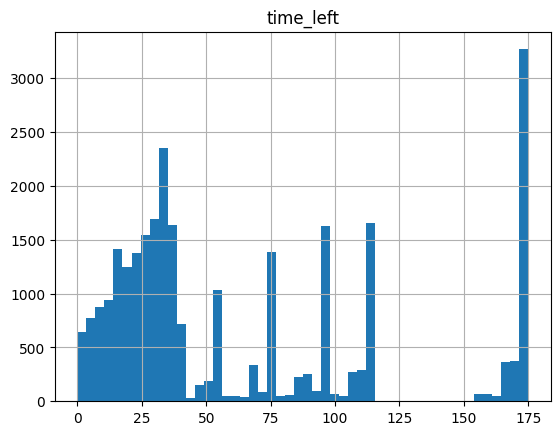

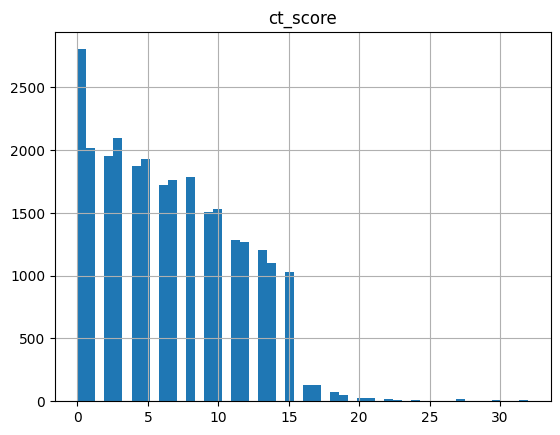

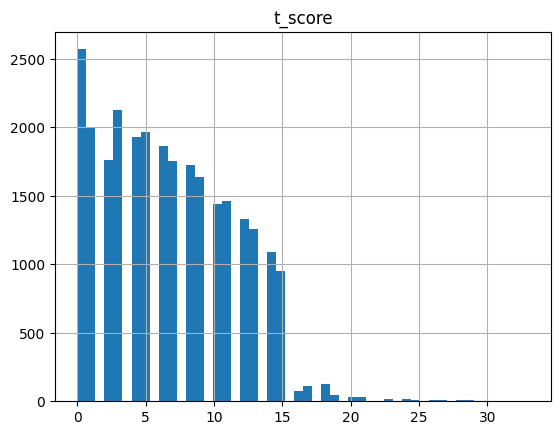

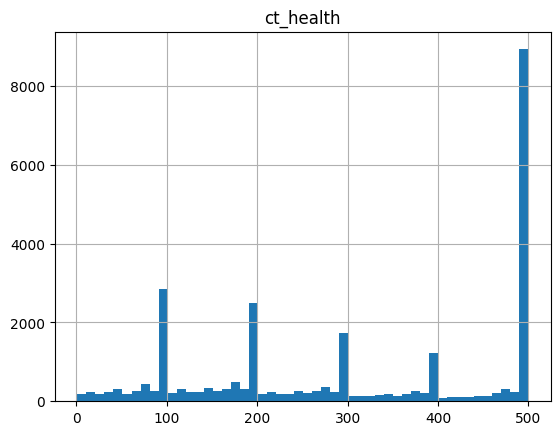

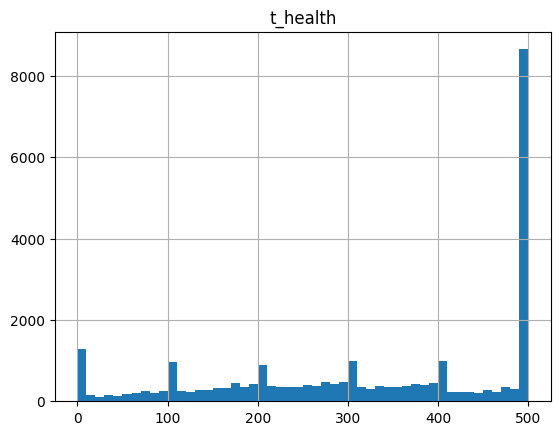

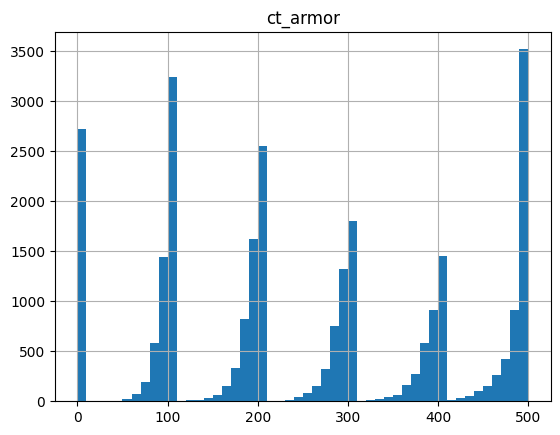

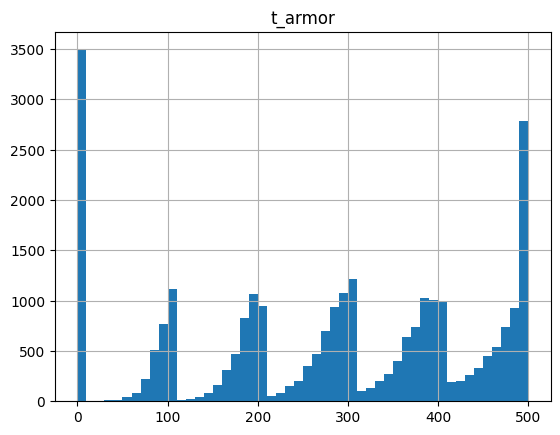

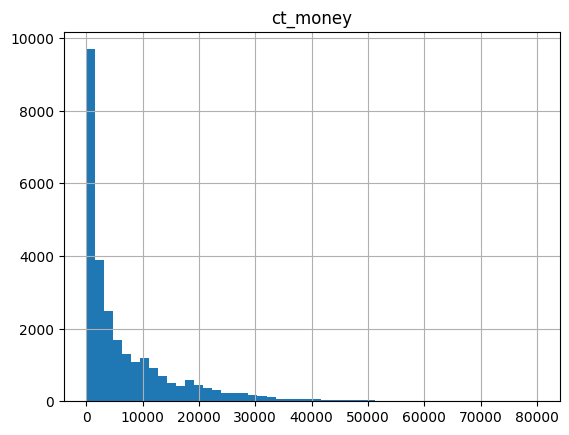

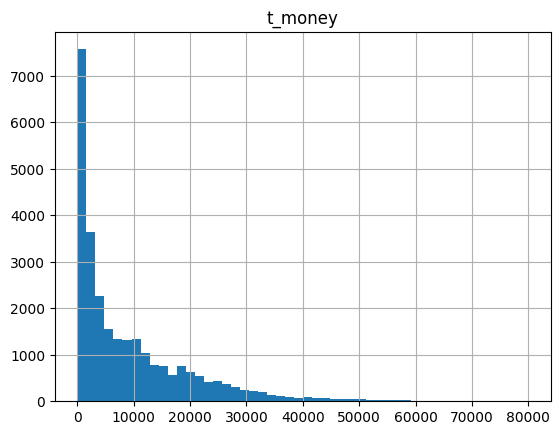

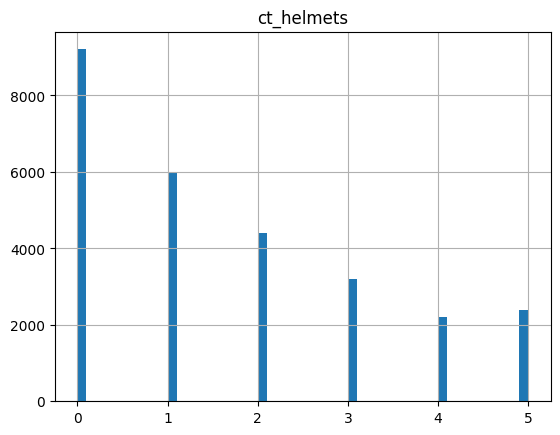

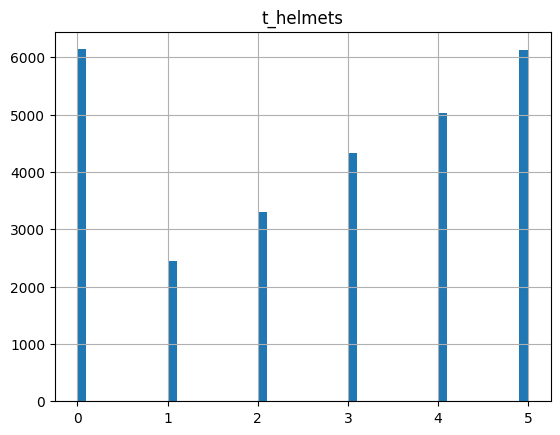

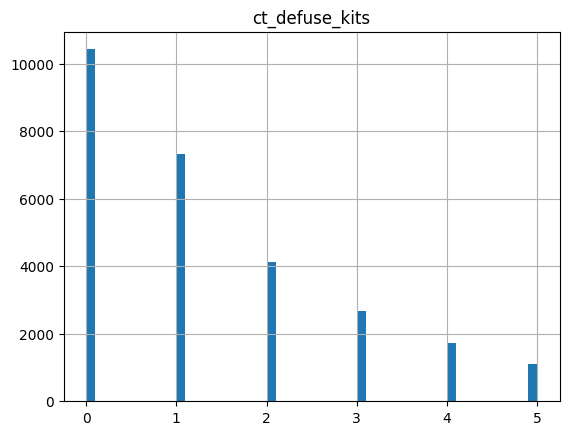

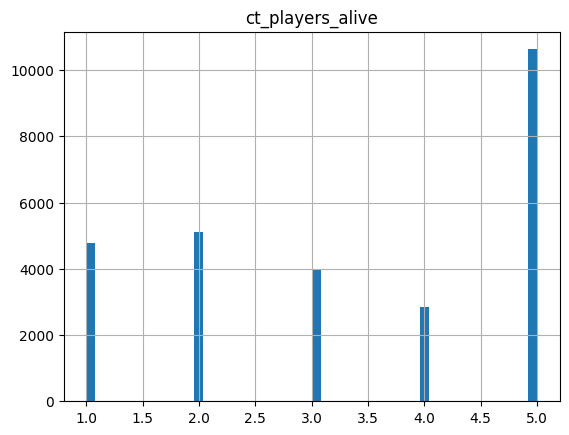

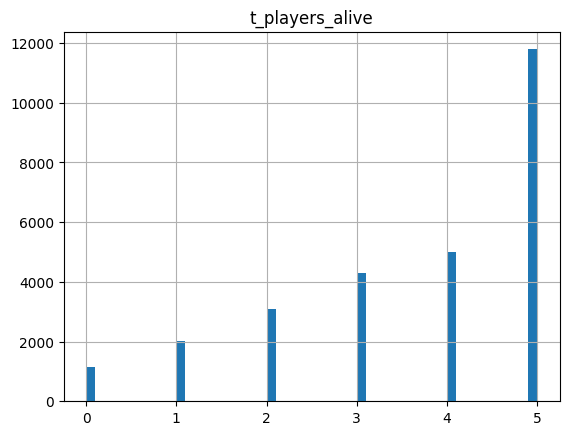

In [20]:
columns = data.columns.to_list()
columns.remove('map')
columns.remove('bomb_planted')

for column in columns:
    data.hist(column, bins = 50)
                

In [21]:
MinMax = MinMaxScaler()

data_MinMax = data.drop(['bomb_planted'], axis=1)
data_MinMax = data_MinMax.drop(['map'], axis=1)
x = pd.DataFrame(MinMax.fit_transform(data_MinMax), columns = columns)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [23]:
param_grid = {
    'n_neighbors': [i for i in range(0, 20, 1)],
    'p': [1, 2],
}

GridSearch = GridSearchCV(KNeighborsClassifier(weights="distance", metric="minkowski"), param_grid=param_grid, scoring="f1_micro")
GridSearch.fit(x_train, y_train)
GridSearch.best_params_

{'n_neighbors': 8, 'p': 2}

In [24]:
KNN = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2, weights="distance")
KNN.fit(x_train, y_train)
y_predict = KNN.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.96      0.88      0.92      4106
        True       0.89      0.96      0.92      4105

    accuracy                           0.92      8211
   macro avg       0.92      0.92      0.92      8211
weighted avg       0.92      0.92      0.92      8211



ROC 

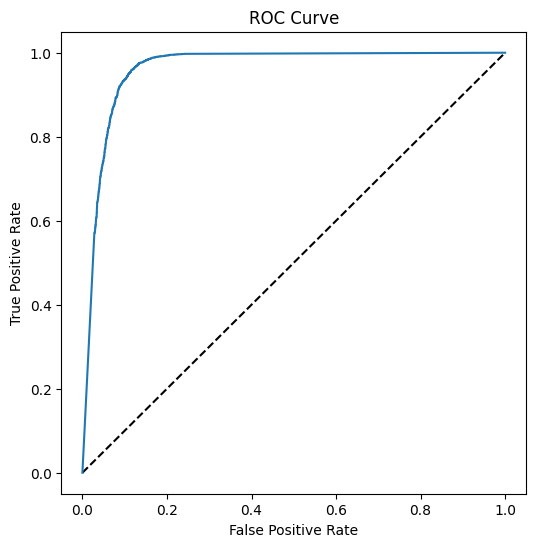

In [25]:
y_scores = KNN.predict_proba(x_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))

plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

AUC

In [26]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9623880978669401


## Naive Bayes

In [27]:
naive_gaus = GaussianNB()
naive_gaus.fit(x_train, y_train)

y_predict_gaus = naive_gaus.predict(x_test)
y_predict_prob = naive_gaus.predict_proba(x_test)

print(classification_report(y_test, y_predict_gaus))

              precision    recall  f1-score   support

       False       0.92      0.89      0.90      4106
        True       0.89      0.92      0.91      4105

    accuracy                           0.90      8211
   macro avg       0.90      0.90      0.90      8211
weighted avg       0.90      0.90      0.90      8211



In [28]:
roc_auc_score(y_test, y_predict_prob[:,1])

0.9576360431512542

In [29]:
cm = confusion_matrix(y_test, y_predict_gaus)
print(cm)

[[3652  454]
 [ 335 3770]]


## Logistic Regression

In [30]:
regression = LogisticRegression() 
GridSearch = GridSearchCV(regression, {"C": np.arange(0.1, 1.0, 0.1)}, scoring="f1_micro")
GridSearch.fit(x_train, y_train).best_params_

{'C': 0.9}

In [31]:
regression = LogisticRegression(C = 0.9)
y_predict_reg = regression.fit(x_train, y_train).predict(x_test)

print(classification_report(y_test, y_predict_reg))

              precision    recall  f1-score   support

       False       0.98      0.90      0.94      4106
        True       0.91      0.98      0.94      4105

    accuracy                           0.94      8211
   macro avg       0.94      0.94      0.94      8211
weighted avg       0.94      0.94      0.94      8211



In [32]:
y_predict_prob_reg = regression.predict_proba(x_test)

roc_auc_score(y_test, y_predict_prob_reg[:,1])

0.9729422436967262

## SVM

In [ ]:
svc = SVC()
param_grid = {
    "C": np.arange(0.1, 0.5, 0.1),
    "kernel": ("linear", "poly", "rbf"),
    "degree": (2, 3, 4),  
}

GridSearch = GridSearchCV(svc, param_grid, scoring="f1_micro")
GridSearch.fit(x_train, y_train).best_params_

In [41]:
svc = SVC(C=0.1, kernel="poly", degree=2, probability=True) 
svc.fit(x_train, y_train)                                      
y_predict_svc = svc.predict(x_test)

print(classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

       False       0.99      0.88      0.93      4106
        True       0.89      0.99      0.94      4105

    accuracy                           0.93      8211
   macro avg       0.94      0.93      0.93      8211
weighted avg       0.94      0.93      0.93      8211



In [43]:
y_predict_prob_svc = svc.predict_proba(x_test)
roc_auc_score(y_test, y_predict_prob_svc[:,1])

0.9711088849507539

## Задание 3

## Metrics

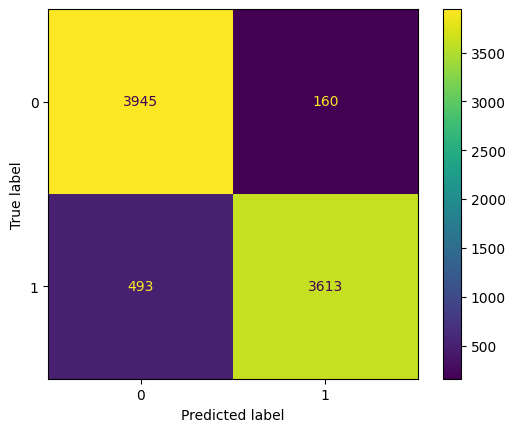

In [64]:
cm = confusion_matrix(y_test, y_predict, labels=[True, False])
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [93]:
def Accuracy(matrix):
    return trace(matrix) / sum(sum(matrix))

def Precision(matrix):
    result = []
    for i in range(len(cm[0])):
        result.append(cm[i][i]/sum(cm[:,i]))
    return result

def Recall(matrix):
    result = []
    for i in range(len(matrix[0])):
        result.append(matrix[i][i] / sum(matrix[i]))
    return result

def F1_score(matrix):
    result = []
    precision = Precision(cm)
    recall = Recall(cm)
    for i in range(len(matrix[0])):
        result.append (2/(1/precision[i] + 1/recall[i]))
    return result
    

In [78]:
from numpy import trace
print( cm[0] )

[3945  160]


In [109]:
print( 'Accuracy:', round(Accuracy(cm), 2) )
print( 'Precision:', np.around(Precision(cm), 2) ) 
print( 'Recall:', np.around(Recall(cm), 2) )
print( 'F1_score:', np.around(F1_score(cm), 2) )

Accuracy: 0.92
Precision: [0.89 0.96]
Recall: [0.96 0.88]
F1_score: [0.92 0.92]


In [108]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.96      0.88      0.92      4106
        True       0.89      0.96      0.92      4105

    accuracy                           0.92      8211
   macro avg       0.92      0.92      0.92      8211
weighted avg       0.92      0.92      0.92      8211



## KNN